In [1]:
print(getwd())
library(igraph)

[1] "E:/2018 Spring/232/project4"



Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [3]:
library(data.table)
system.time(dt <- fread("movie_network_edgelist.txt", encoding='UTF-8', header = F, sep = ",", fill = T))
head(dt)

   user  system elapsed 
  33.72    3.35  104.09 

V1,V2,V3
Aasoo Billa (1971),Aj Da Mahinwal (1973),0.10000000
Aasoo Billa (1971),Andaleeb (1969),0.05555556
Aasoo Billa (1971),Babul (1971),0.13333333
Aasoo Billa (1971),Badla (1968),0.18750000
Aasoo Billa (1971),Basheera (1972),0.11764706
Aasoo Billa (1971),Chann Sajna (1970),0.10526316


In [89]:
head(dt)
g <- graph.data.frame(dt, directed=F)
cm =  fastgreedy.community(g)

V1,V2,V3
Aasoo Billa (1971),Aj Da Mahinwal (1973),0.10000000
Aasoo Billa (1971),Andaleeb (1969),0.05555556
Aasoo Billa (1971),Babul (1971),0.13333333
Aasoo Billa (1971),Badla (1968),0.18750000
Aasoo Billa (1971),Basheera (1972),0.11764706
Aasoo Billa (1971),Chann Sajna (1970),0.10526316


In [177]:
system.time(movie_rate <- fread("movie_rating_utf8.txt", encoding='UTF-8', header = F, sep = "\t", fill = T))
movie_rate <- movie_rate[,-c(2)]
colnames(movie_rate) <- c("movie", "rating")
head(movie_rate)
nrow(movie_rate)

   user  system elapsed 
   0.14    0.03    0.55 

movie,rating
Bamma Maata Bangaru Baata (1990),7.5
The 61st Annual Golden Globe Awards (2004),5.1
Con la musica a otra parte (1975),3.4
Funeralii fericite (2013),8.1
"Zoom, Zoom, Superman! (1973)",5.6
Fever Lake (1996),2.9


[1] 348547

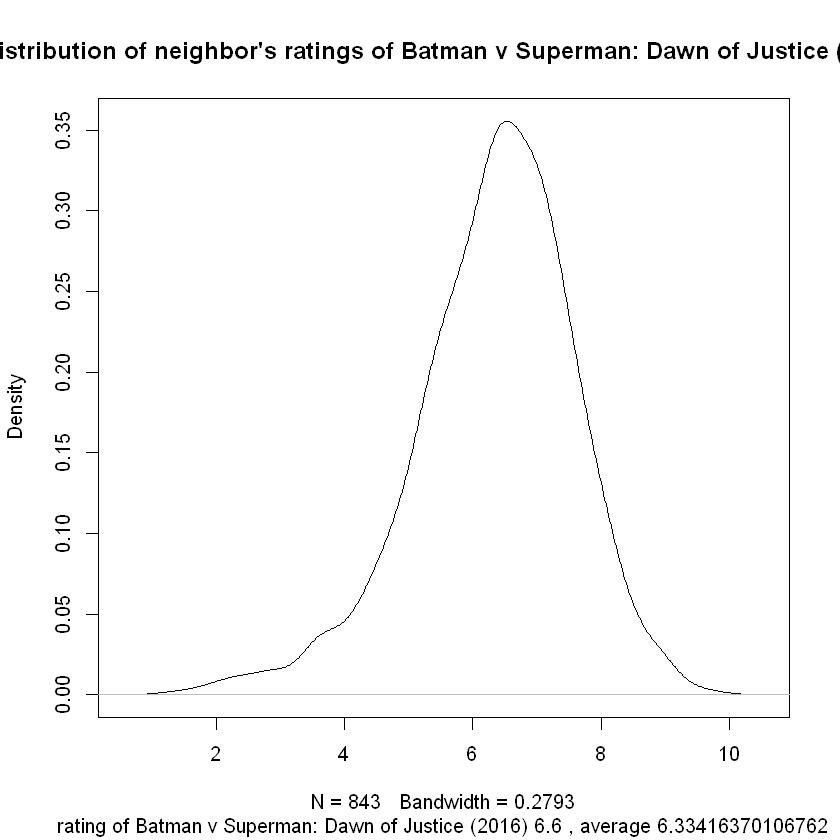

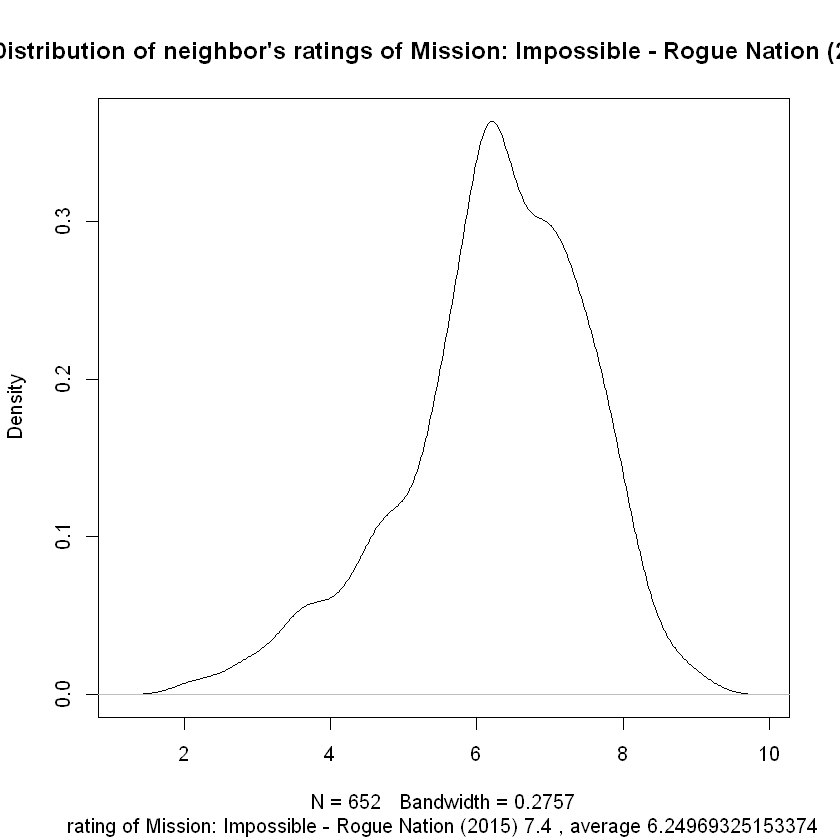

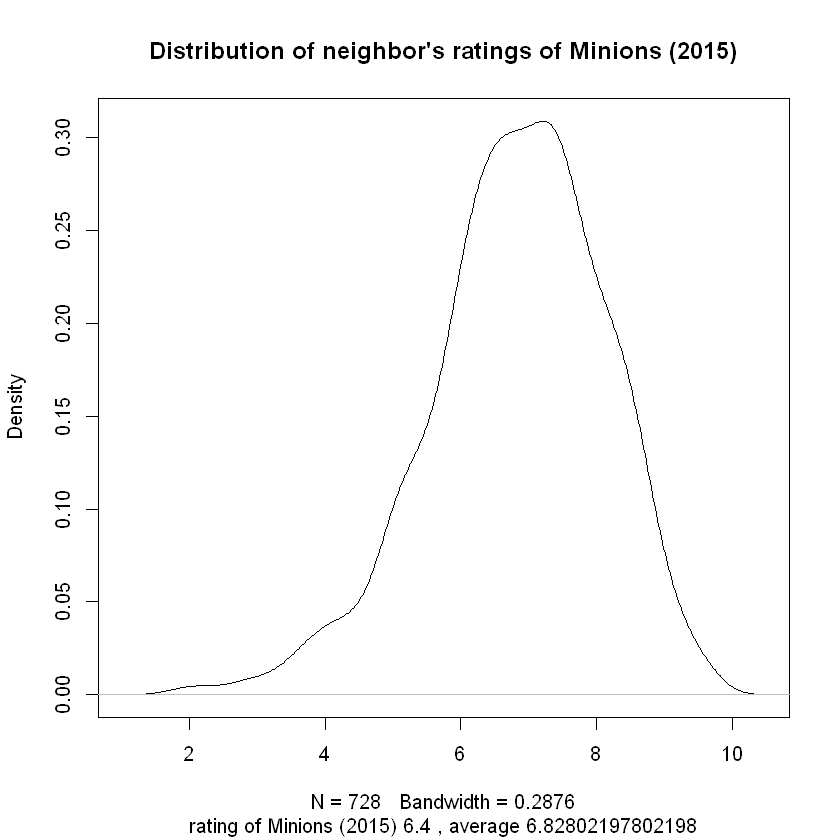

In [179]:
select_rating <- c(6.6,7.4,6.4)
for(i in 1:length(movie_name)){
    nei <- neighbors(g, which(V(g)$name == movie_name[i]))
    subg <- induced_subgraph(g, c(nei,V(g)[which(V(g)$name == movie_name[i])])) 
    neighbor_rate <- movie_rate[movie_rate$movie %in% V(subg)$name]
    a <- mean(neighbor_rate$rating)
    r <- select_rating[i]
    d <- density(neighbor_rate$rating) # returns the density data                          
    plot(d, main=paste("Distribution of neighbor's ratings of",movie_name[i]), sub=paste("rating of",movie_name[i], r,", average",a))
    dev.copy2pdf(file = paste("Q9_movie_",i,".pdf",sep=""))
}

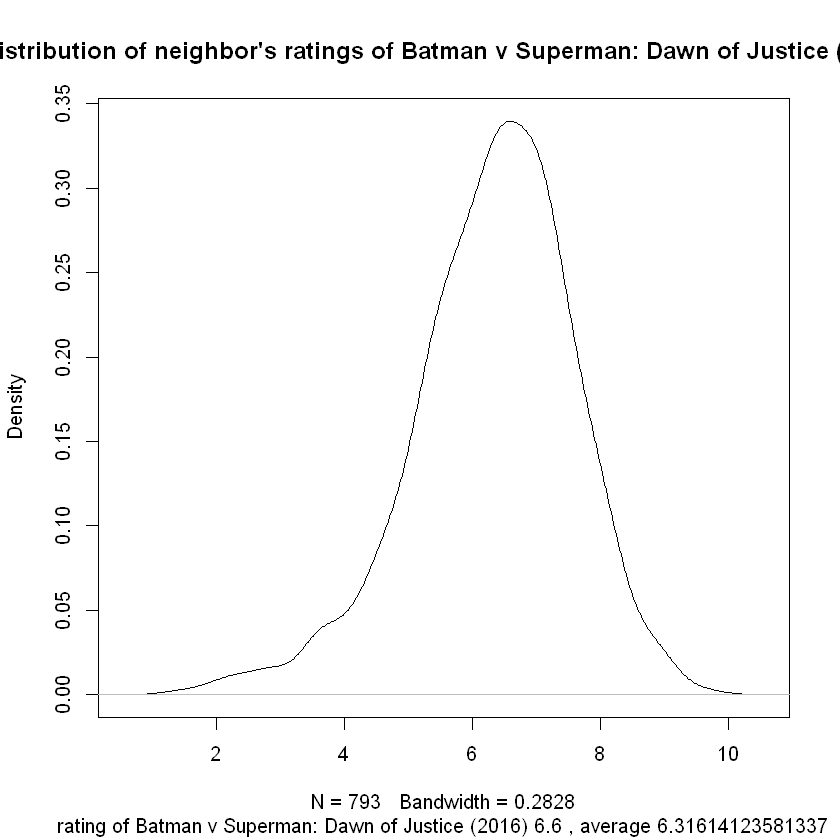

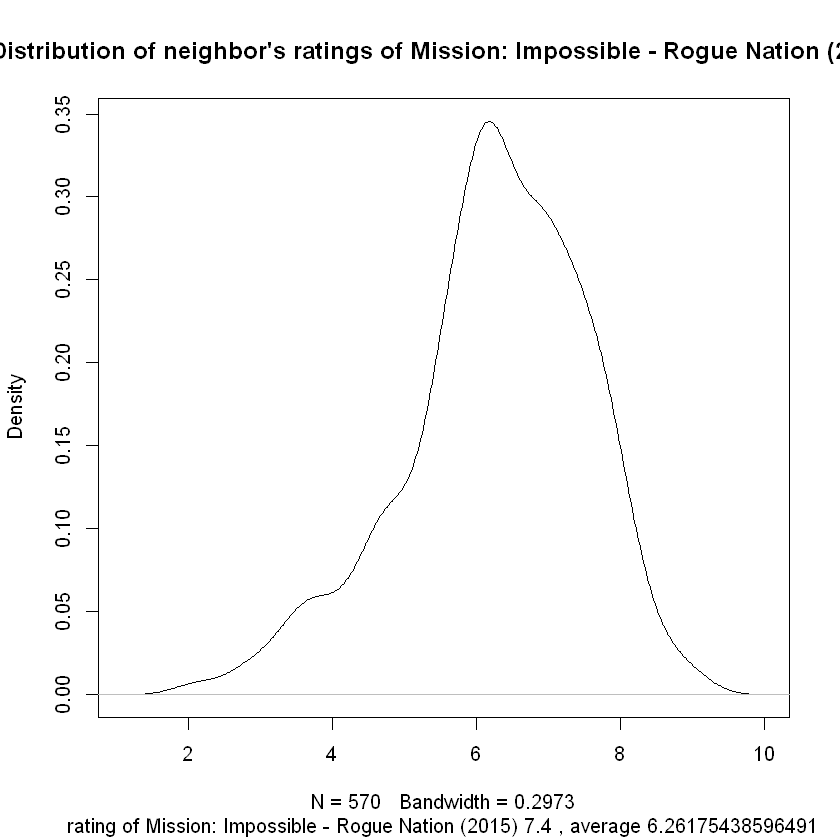

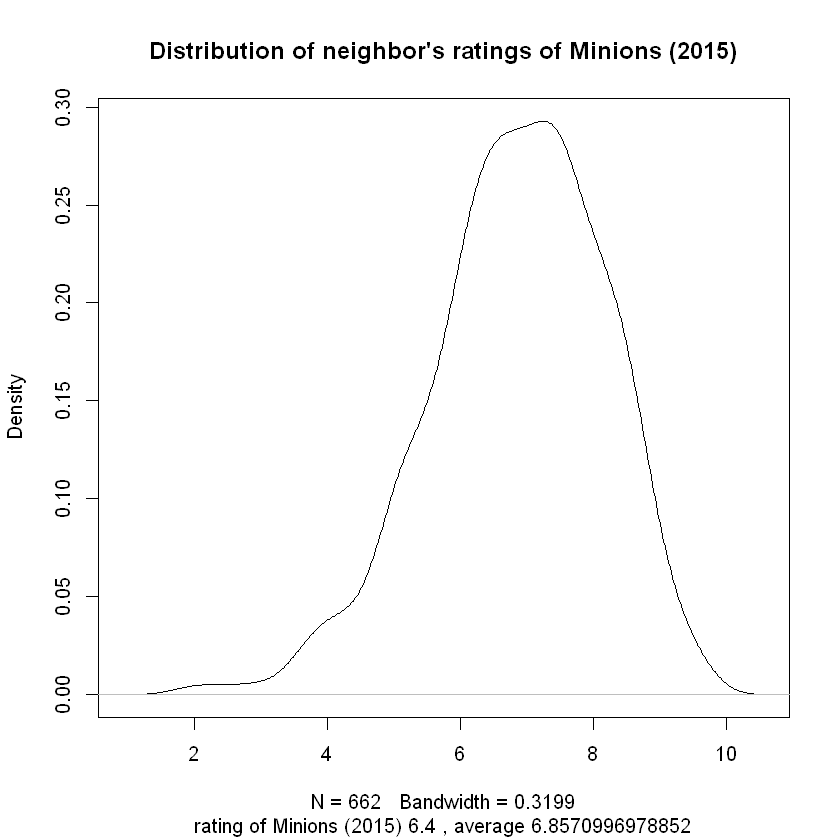

In [180]:
select_rating <- c(6.6,7.4,6.4)
for(i in 1:length(movie_name)){
    subg <- induced_subgraph(g,V(g)[which(cm$membership == cm$membership[which(V(g)$name == movie_name[i])])])
    nei <- neighbors(subg, which(V(subg)$name == movie_name[i]))
    subg <- induced_subgraph(subg, c(nei,V(subg)[which(V(subg)$name == movie_name[i])]))
    neighbor_rate <- movie_rate[movie_rate$movie %in% V(subg)$name]
    a <- mean(neighbor_rate$rating)
    r <- select_rating[i]
    d <- density(neighbor_rate$rating) # returns the density data                          
    plot(d, main=paste("Distribution of neighbor's ratings of",movie_name[i]), sub=paste("rating of",movie_name[i], r,", average",a))
    dev.copy2pdf(file = paste("Q10_movie_",i,".pdf",sep=""))
}

In [175]:
for(i in 1:length(movie_name)){
    nei <- neighbors(g, which(V(g)$name == movie_name[i]))
    subg <- induced_subgraph(g, c(nei,V(g)[which(V(g)$name == movie_name[i])]))
    x <- movie_name[i]
    tab <- data.frame(cbind(
      name=V(subg)[neighbors(subg,movie_name[i])]$name,
      weight=E(subg)[x %->% neighbors(subg,x)]$V3)) # or %--%, %<-%
    tab <- tab[order(tab$weight, decreasing=TRUE),]
    tab <- tab[1:5,]
    results <- c(1:5)
    for(j in 1:nrow(tab)){
        result[j] <- cm$membership[which(V(g)$name == tab[j,"name"])]
    }
    tab[, "community"] <- result
    print(tab)
}

                     name            weight community
97          Eloise (2015)               0.3         3
275   Man of Steel (2013) 0.233333333333333         3
778 Into the Storm (2014) 0.233333333333333         3
684     Real Steel (2011) 0.172413793103448         3
756 Love and Honor (2013) 0.161290322580645         3
                              name            weight community
458                     Fan (2015) 0.481481481481481         3
459                 Phantom (2015) 0.464285714285714         3
359     Muppets Most Wanted (2014) 0.448275862068965         3
126       Breaking the Bank (2014) 0.354838709677419         3
31  Avengers: Age of Ultron (2015)  0.32258064516129         3
                          name            weight community
45                 Cars (2006)              0.75         3
676                  Up (2009) 0.533333333333333         3
294           The Lorax (2012) 0.526315789473684         3
194 Monsters University (2013) 0.473684210526316         3
193